In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [9, 6]

2022-07-06 11:16:34.844369: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-06 11:16:34.878764: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-06 11:16:34.878780: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Data Preparation

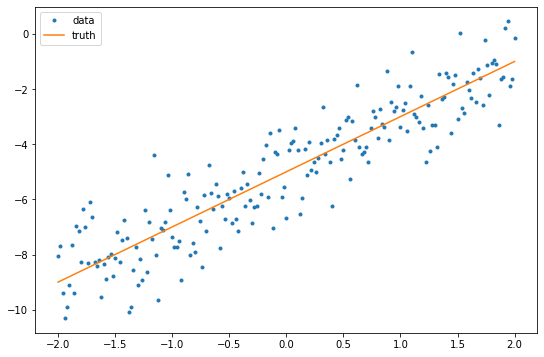

In [13]:
# create (x,y) pairs
x = tf.linspace(-2, 2, 201) # default is float64
x = tf.cast(x, tf.float32) # cast to 32
def f(x):
    y = 2*x - 5
    return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x, y, '.', label='data')
plt.plot(x, f(x), label='truth')
plt.legend()

# regression - no keras

mean squared error: 31.90832
mean squared error: 1.5003117
mean squared error: 1.0282297
mean squared error: 1.0201933
mean squared error: 1.020053
mean squared error: 1.0200508
mean squared error: 1.0200506
mean squared error: 1.0200506
mean squared error: 1.0200506
mean squared error: 1.0200506


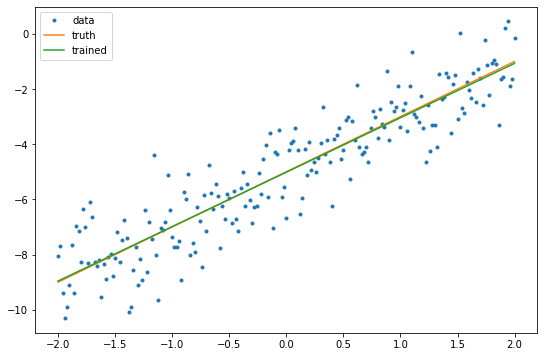

In [14]:
# y = w x + b
w = tf.Variable(0.1)
b = tf.Variable(0.1)

learning_rate = 0.01
for step in range(1000):
    
    # define MSE
    with tf.GradientTape() as tape:
        prediction = x * w + b
        error = (y-prediction)**2
        mean_error = tf.reduce_mean(error)
    
    # calculate gradient and update variables
    w_der, b_der = tape.gradient(mean_error, [w, b])
    w.assign_add(- learning_rate*w_der)
    b.assign_add(- learning_rate*b_der)


    if step % 100 == 0:
        print('mean squared error: ' + str(mean_error.numpy()))

# show fit
plt.figure()
plt.plot(x, y, '.', label='data')
plt.plot(x, f(x), label='truth')
plt.plot(x, prediction, label='trained')
plt.legend()
plt.show()

# regression - with keras

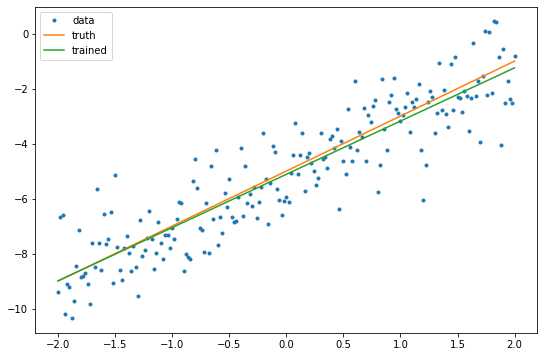

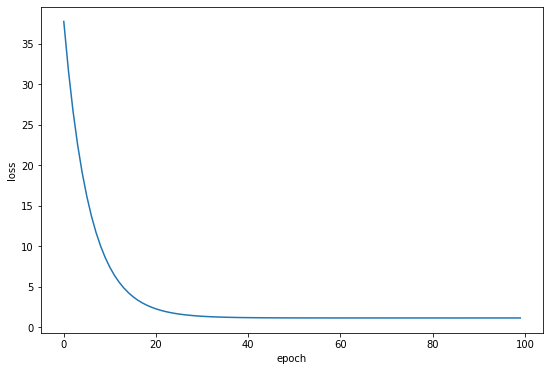

In [8]:
# define a linear model (simplest)
class LinearModel(tf.keras.Model):
    
    def __init__(self):
        super().__init__()
        # this defines wx + b
        self.dense = tf.keras.layers.Dense(units=1)
    
    def call(self, x, training=True):
        x = x[:, tf.newaxis] # x is expected to be a 1D array
        x = self.dense(x)
        return tf.squeeze(x, axis=1)

# initialise model and run Keras methods
model = LinearModel()
model.compile(loss=tf.keras.losses.MSE,
                 optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))
history = model.fit(x, y, epochs=100, batch_size=51, verbose=0)

# plot
plt.figure()
plt.plot(x, y, '.', label='data')
plt.plot(x, f(x), label='truth')
plt.plot(x, model(x), label='trained')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('epoch'), plt.ylabel('loss')
plt.show()